# Exercícios

### Para todos os desafios, insira legendas, rótulos dos eixos, título do gráfico.

### Resolva os 3 primeiros exercícios usando matplotlib e os 3 seguintes usando altair. O último, fica à seu critério

## 1) Utilizando o dataset Pokemon, crie uma função que receba o dataset e o atributo e retorne um histograma que mostre a distribuição do valor dos atributos “attack”, “defense”,”Sp.Atk”, “Sp.Def” e “Speed”. Insira uma linha indicando o valor médio do atributo

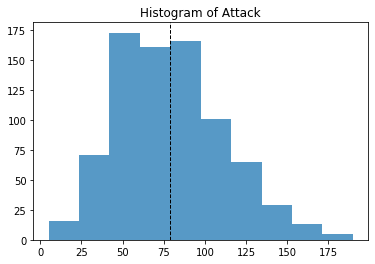

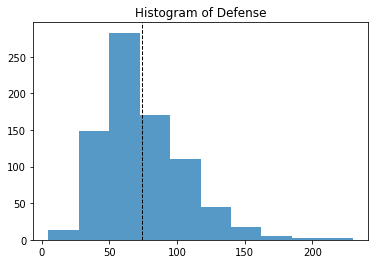

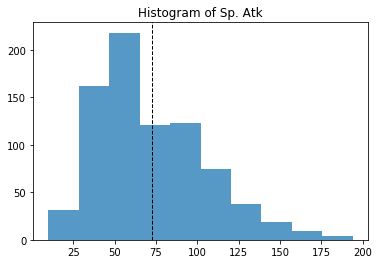

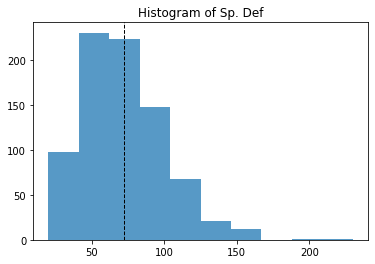

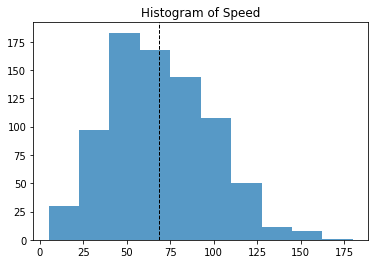

In [7]:
# resposta 1
import matplotlib.pyplot as plt
import pandas as pd

def show_histogram(dataset, attribute):
    plt.hist(dataset[attribute], alpha=0.75)
    plt.axvline(dataset[attribute].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.title(f'Histogram of {attribute}')
    plt.show()
    
poke = pd.read_csv('pokemon.csv')
show_histogram(poke, 'Attack')
show_histogram(poke, 'Defense')
show_histogram(poke, 'Sp. Atk')
show_histogram(poke, 'Sp. Def')
show_histogram(poke, 'Speed')

## 2) Usando o dataset Pokemon, crie um scatter plot comparando ataque (eixo x) e defesa (eixo y) de pokemons dos tipos Fire e Water. 

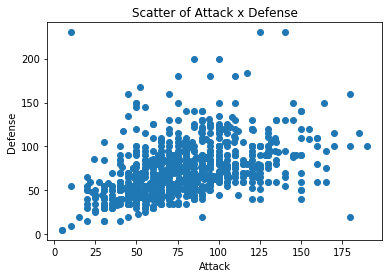

In [5]:
# resposta 2
plt.scatter(poke['Attack'], poke['Defense'])
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Scatter of Attack x Defense')
plt.show()

## 3) Usando o dataset Pokemons, crie um gráfico de linha para comparar a quantidade de pokemons de cada tipo ao longo das gerações

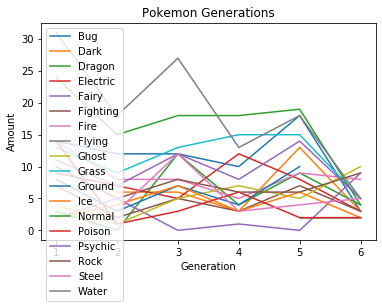

In [6]:
# resposta 3
import numpy as np

pokemons_by_type = poke.groupby(['Type 1'])

for pokemon_by_type in pokemons_by_type:
    generation_min = min(pokemon_by_type[1]['Generation'])
    generation_max = max(pokemon_by_type[1]['Generation'])
    array_generations = []
    array_amount_of_pokemons = []
    for pokemon_generation in range(generation_min, generation_max + 1):
        array_generations.append(pokemon_generation)
        array_amount_of_pokemons.append((pokemon_by_type[1][pokemon_by_type[1]['Generation'] == pokemon_generation]).count()[0])
    plt.plot(array_generations, array_amount_of_pokemons, label=pokemon_by_type[0])

plt.xlabel('Generation')
plt.ylabel('Amount')
plt.title("Pokemon Generations")
plt.legend()
plt.show()


## 4) Utilizando o dataset airports (var = data.airports()):
    -> Faça um rank bar dos 5 primeiros estados dos EUA com maior número de aeroportos


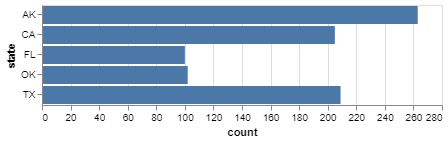

In [1]:
# resposta 4
import altair as alt
from vega_datasets import data
airports = data.airports()[data.airports()['country'] == 'USA'].groupby(['state']).size().reset_index(name='count').sort_values(by=['count'], ascending=False).head(5)
alt.Chart(airports).mark_bar().encode(y='state', x='count')

## 5) Utilizando o conjunto de dados íris (var = data.íris()):
    -> Crie dois gráficos scatter, chart1 e chart2. Para o chart1, x=petalLenght, y=petalWidth. Para o chart2, x = sepalLenght, y=sepalWidth.

    -> Componha esses gráficos numa única apresentação. Para isso, faça chart1 | chart2


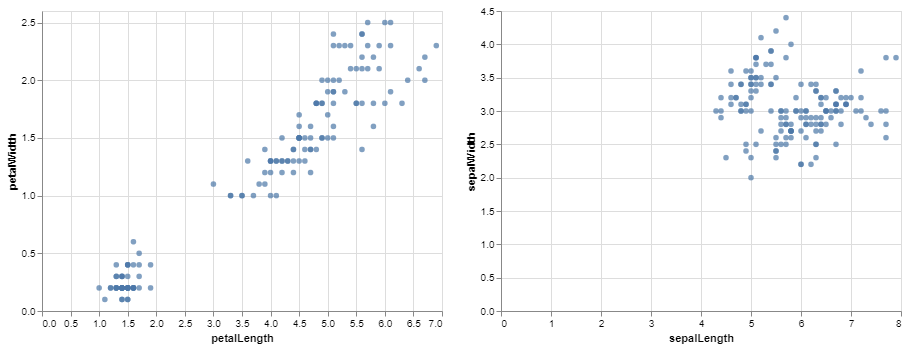

In [2]:
# resposta 5
chart_petal = alt.Chart(data.iris()).mark_circle().encode(x='petalLength', y='petalWidth')
chart_sepal = alt.Chart(data.iris()).mark_circle().encode(x='sepalLength', y='sepalWidth')
chart_petal | chart_sepal

## 6) Usando o dataset Pokemon, crie um rank bar que mostre o rank para Type 1

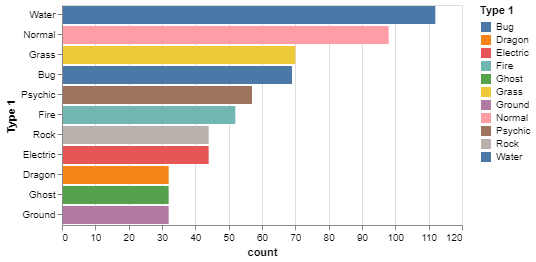

In [61]:
# resposta 6
alt.Chart(poke).transform_aggregate(
    count='count()',
    groupby=['Type 1']
).transform_window(
    rank='rank(count)',
    sort=[alt.SortField('count', order='descending')]
).transform_filter(
    alt.datum.rank < 10
).mark_bar().encode(
    y=alt.Y('Type 1:N',
        sort=alt.EncodingSortField(field='count', op='sum', order='descending')
    ),
    x='count:Q',
    color=alt.Color('Type 1')
)

## 7) Utilizando o dataset Pokemon, crie um gráfico de barras que mostre, para cada geração, a proporção de pokemons Legendários e aqueles que não são legendários. Use stacked bar. 

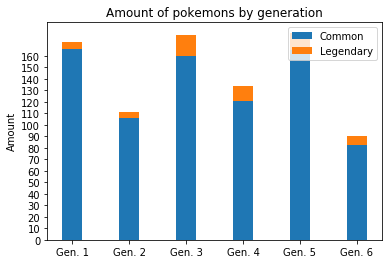

In [47]:
# resposta 7
array_generations = []
total_pokemons = []
total_pokemons_legendary = []

pokemons_by_generation = poke.groupby(['Generation'])
for pokemon_by_generation in pokemons_by_generation:
    array_generations.append(f'Gen. {pokemon_by_generation[0]}')
    total_pokemons.append((pokemon_by_generation[1]).count()[0])
    total_pokemons_legendary.append((pokemon_by_generation[1][pokemon_by_generation[1]['Legendary'] == True]).count()[0])

N = pokemons_by_generation.size().count()
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, total_pokemons, width)
p2 = plt.bar(ind, total_pokemons_legendary, width, bottom=menMeans)

plt.ylabel('Amount')
plt.title('Amount of pokemons by generation')
plt.xticks(ind, array_generations)
plt.yticks(np.arange(0, max(array_totals), 10))
plt.legend((p1[0], p2[0]), ('Common', 'Legendary'))

plt.show()